<a href="https://colab.research.google.com/github/edasinar/Data-Mining-Midterm-Assignment/blob/main/data_mining_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIL 366 Data Mining: Homework-2
### Bilinmesi gerekenler
distance measures, preprocessing (aggregation, cleaning, sampling),
pandas,numpy, matplotlib.pyplot
### Öğrenme Hedefleri 
Pandas kullanılarak distance measureler kullanılarak data benzerliğinin ölçülmesi ve outlier detection, sampling ile sample size'ın küçültülmesi ve ne kadar sample size'ın datayı ne kadar temsil ettiğinin gözlemlenmesi.


### Giriş
Covid süresince Türkiye location datasından Google'in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır.
Bu ödevde sizden bu datayla ilgili önanaliz yapıp raporlamanız istenmektedir. Datayı indirme ve yüklemede bir bütünlük olması açısından bu datayı drive üzerinden erişime açtım, aşağıdaki şekilde erişebilirsiniz.



In [ ]:
import pandas as pd
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url2020)
print(url2021)

df20 = pd.read_csv(url2020)
df20.info()

df21 = pd.read_csv(url2021)
df21.info()


https://drive.google.com/uc?id=18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ
https://drive.google.com/uc?id=1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id        

### Yapılacaklar
1. Yukarıdaki data framede içerisinde data olmayan (tüm sütun null), sütunları çıkarınız. 
2. Mahalanobis distance distributiondan uzaklığı ölçtüğü için outlier belirlenmesinde kullanılabilir.2020 ve 2021 her iki datayıda aylara göre gruplandırdıktan(mean kullanabilirsiniz) sonra (aggregation) her bir satır ile data (tüm sütun) arasındaki Mahalanobis distance'ı hesaplayarak yeni bir sütun olarak ekleyiniz ve buradaki en büyük elemanın outlier olduğunu 2020 ve 2021 yılları için ayrı ayrı gösteriniz. 


In [ ]:
#Distance ölçümü için 
#covariance matrisini numpy.cov() fonksiyonu, 
#inverse (tersini) numpy.linalg.inv() fonksiyonu 
#ve aşağıdaki scipy fonksiyonunu kullanabilirsiniz: 
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html 
import numpy as np #np.cov(), np.linalg.inv()
from scipy.spatial import distance



3. 2020 ve 2021 datalarını aylara göre grupladıktan sonra (mean değerleri ile) en az iki adet fark/benzerlik ölçümü (**slaylatlardaki similarity measures**) kullanarak 2020 ve 2021 datalarının 9-14 sütun verilerinin **aynı aylarda** birbirlerine ne oranda benzediğini bulunuz.
4. 2020 datasından (50-1000) aralığında farklı büyüklüklerde samplelar oluşturarak aylık mean değerlerin ortalama ne kadar değiştiğini grafikle gösteriniz (x sample size, y ortalama değişim): **Açıklama**▶
Tüm datanın aylık ortalama değerleri ile sample datanın aylık ortalama değerleri arasındaki farkların mutlak değerlerini toplayarak ortalamasını almanız gerekiyor. Bu şekilde her bir sample için bir hata datası elde etmiş oluyorsunuz. Sonra bunları x axisde sample size, y axisde hata olacak şekilde grafiklemeniz istenmektedir.
5. 2020 datasından her aydan (50-1000) aralığında olacak şekilde samplelar oluşturarak aylık mean değerlerin ortalama ne kadar değiştiğini grafikle gösteriniz (x sample size, y ortalama değişim): **Açıklama**▶ Bu soruda her bir aydan eşit miktarda sampller alarak sample oluşturmanız (mesela 50 için her bir aydan 50şer satır alarak, aysayısı x 50 büyüklüğünde bir sample elde etmiş oluyorsunuz) ve 4.sorudaki gibi ortalama hatayı bularak yine sample size'a göre grafiklemeniz istenmektedir. 

***SORU 1***

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()

df21 = pd.read_csv(url2021)
df21.info()


print(df20.shape) #df20'inin kaç satır ve sütundan oluştuğunu verir
print(df21.shape) #df21'in kaç satır ve sütundan oluştuğunu verir
print(df20.isnull().sum()) #sütunlardaki toplam boş veri sayısını verir
print(df21.isnull().sum()) #sütunlardaki toplam boş veri sayısını verir
df20_2 = df20.drop(columns=["metro_area","census_fips_code"]) # sütundaki boş sayısı toplam satır sayısına eşit olan iki sütunu sildim
df21_2 = df21.drop(columns=["metro_area","census_fips_code"]) # sütundaki boş sayısı toplam satır sayısına eşit olan iki sütunu sildim
#print(df20_2.info());print();print(df21_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

***SORU 2***

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy.spatial import distance

url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df20 = pd.read_csv(url2020)
df21 = pd.read_csv(url2021)

df20_2 = df20.drop(columns=["metro_area","census_fips_code"])
df21_2 = df21.drop(columns=["metro_area","census_fips_code"])


#buradaki işlemleri https://www.machinelearningplus.com/statistics/mahalanobis-distance/ sitesindeki koddan referans alarak yaptım

columnName = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
              'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']

########################################################### 2020 VERİLERİ İÇİN MAHALANOBIS HESABI ###########################################################
df20_2.index = pd.to_datetime(df20["date"])
f = df20_2.groupby(pd.DatetimeIndex(df20_2["date"]).month).mean()
fM = np.mean(f)
x = f-fM

#covariance matris:
cov = np.cov(f[columnName].values.T)
tCov = sp.linalg.inv(cov)

#çarpımlar
#left'te x'in transpozunu alınca hata verdi o yüzden transpozu sonradan aldım
left = np.dot(x,tCov)
right = np.dot(left,x.T)

new = right.diagonal()
f["mahalanobis"] = new
print(f)
print(f["mahalanobis"].max())
#f.boxplot('mahalanobis',rot=90,fontsize=10)

########################################################### 2021 VERİLERİ İÇİN MAHALANOBIS HESABI ###########################################################
df21_2.index = pd.to_datetime(df21["date"])
fig = df21_2.groupby(pd.DatetimeIndex(df21["date"]).month).mean()
figMean = np.mean(fig)
odd = fig - figMean
#covariance matris
coVar = np.cov(fig[columnName].values.T)
tCoVar = sp.linalg.inv(coVar)
#çarpımlar
sol = np.dot(odd, tCoVar)
sag = np.dot(sol, odd.T)

mahalaDist = sag.diagonal()

fig["mahalanobis"] = mahalaDist
print(fig)
print(fig["mahalanobis"].max())
#fig.boxplot('mahalanobis',rot=90,fontsize=10)
########################## YORUM ###################################
"""
60. ve 41. satırda seçilen değerler outlier'dır denmemiz istenmekte fakat boxplot ile çizildiğinde herhangi
 bir outlier görünmemekte o yüzden seçilen değerler outlier'dır.
"""

      retail_and_recreation_percent_change_from_baseline  ...  mahalanobis
date                                                      ...             
2                                              2.028130   ...     6.799677
3                                            -21.700010   ...     2.515010
4                                            -63.148836   ...     8.602830
5                                            -55.673896   ...     8.229767
6                                            -18.156210   ...     7.663963
7                                             -6.876458   ...     3.050788
8                                             -9.014545   ...     6.643364
9                                            -13.071653   ...     1.514244
10                                           -13.590351   ...     5.844341
11                                           -26.801938   ...     2.320447
12                                           -47.541929   ...     6.815570

[11 rows x 7 columns]
8.

"\n60. ve 41. satırda seçilen değerler outlier'dır denmemiz istenmekte fakat boxplot ile çizildiğinde herhangi bir outlier görünmemekte o yüzden seçilen değerler outlier'dır.\n"

***SORU 3***

In [ ]:
df20.index = pd.to_datetime(df20['date'])
df21.index = pd.to_datetime(df21['date'])

f = df20.groupby(pd.DatetimeIndex(df20['date']).month).mean()
f2 = df21.groupby(pd.DatetimeIndex(df21['date']).month).mean()

fNew = f.loc[2:10].drop(columns=["metro_area","census_fips_code"])
f2New = f2.loc[2:10].drop(columns=["metro_area","census_fips_code"])

#NORMALİZASYON
fM = np.mean(fNew)
fM2 = np.mean(f2New)
x1 = fNew-fM
x2 = f2New - fM2

x1 = x1/np.std(x1)
x2 = x2/np.std(x2)

#CALCULATE AND PRINT CANBERRA DISTANCE
bos = []
for i in range(0,9):
  bos2 = []
  for j in range(0,6):
    canberra_similarity = distance.canberra(x1.iloc[i][j], x2.iloc[i][j])
    bos2.append(canberra_similarity)
    #print(canberra_similarity, "   ", end='')
  bos.append(bos2)
  #print()

s15 = pd.DataFrame(bos)
print(s15)

#CALCULATE AND PRINT MINKOWSKI DISTANCE
minkowski = []
for i in range(0,9):
  minkowski2 = []
  for j in range(0,6):
    minkowski_similarity = distance.minkowski(x1.iloc[i][j],x2.iloc[i][j])
    minkowski2.append(minkowski_similarity)
  minkowski.append(minkowski2)

s16 = pd.DataFrame(minkowski)
print(s16)
########################## YORUM ###################################
"""
satırlar benzer olan ayları sütunlar ise bize verilen verideki 9-14 sütunlarını temsil etmektedir.
aşağıdaki tablodan da görüldüğü üzere çoğunlukla değerler 0-1 arasındadır ve bunlar da birbirlerine benzerlik oranıdır
yani değer 1'e yaklaştıkça bunlar birbirine benzeme oranı artmaktadır lakin bazı değerler 1'in üstündedir bunlara da aykırı
değer diyebiliriz.
"""

          0         1         2         3         4         5
0  1.000000  1.000000  0.575307  1.000000  1.000000  1.000000
1  1.000000  0.203256  0.151526  0.840857  0.535474  0.810479
2  0.294783  0.386171  0.243590  0.288649  0.391339  0.222772
3  0.117186  0.010267  0.142487  0.150316  0.060887  0.017636
4  0.059268  0.299856  0.157586  0.071622  0.012418  0.436694
5  0.192037  0.076256  0.147789  0.217932  1.000000  0.145485
6  0.259723  0.285213  0.034546  0.065713  0.961128  0.040664
7  0.397823  0.348213  0.003501  0.325663  0.577913  0.299088
8  0.392891  0.086133  0.021437  0.187727  0.494760  0.464714
          0         1         2         3         4         5
0  2.409058  1.442089  0.921393  1.833909  2.590144  1.948599
1  0.720449  0.251122  0.232377  0.736582  0.167351  0.422586
2  0.889549  1.129356  0.665176  0.859522  1.057113  0.725789
3  0.335147  0.025833  0.327063  0.426971  0.196413  0.053683
4  0.023872  0.311292  0.129357  0.028945  0.009437  0.339975
5  0.345

"\nsatırlar benzer olan ayları sütunlar ise bize verilen verideki 9-14 sütunlarını temsil etmektedir.\naşağıdaki tablodan da görüldüğü üzere çoğunlukla değerler 0-1 arasındadır ve bunlar da birbirlerine benzerlik oranıdır\nyani değer 1'e yaklaştıkça bunlar birbirine benzeme oranı artmaktadır lakin bazı değerler 1'in üstündedir bunlara da aykırı\ndeğer diyebiliriz.\n"

***SORU 4*** 

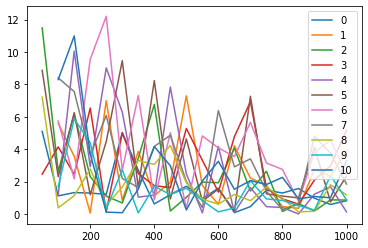

In [ ]:
farkOrt = []
df20.index = pd.DatetimeIndex(df20["date"]).month
# kodları ilk önce spyder'da yazıyorum en son olunca buraya kopyalıyordum spyder'da nan değerler olunca direkt nan olarak atıyor o yüzden #
# nan değerlerini fillna ile doldurdum orada işlem yapabilmek için ama galiba burada gerek yok nolur nolmaz diye commentli bırakıyorum :) #
#for i in range(0,6):
#    df20[columnName[i]].fillna(0,inplace=True)


for k in range(1,21):
    sample = df20.sample(50*k)
    f = sample.groupby(pd.DatetimeIndex(sample['date']).month).mean()
    f2 = df20.groupby(pd.DatetimeIndex(df20['date']).month).mean()
       
    monthlyMean = []
    sampleMean = []
    toplam = 0
    toplam2 = 0
    for i in range (2,13):
        for j in range(0,6):
            toplam2 += f.loc[i][columnName[j]]
            toplam += f2.loc[i][columnName[j]]
        sampleMean.append((toplam2/6))
        monthlyMean.append((toplam/6))
        toplam2 = 0
        toplam = 0
        
    fark = []
        
    for i in range(0,11):
        fark.append(abs(monthlyMean[i]-sampleMean[i]))
    farkOrt.append(fark)
    


satir = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
s4 = pd.DataFrame(farkOrt,index=satir)

#print(s4)

s4.plot(kind="line")

***SORU 5***

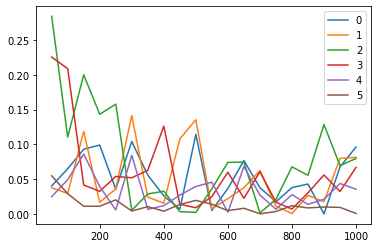

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy.spatial import distance

url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df20 = pd.read_csv(url2020)
#df20.info()
df21 = pd.read_csv(url2021)
#df21.info()


columnName = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
              'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']





df20.index = pd.DatetimeIndex(df20["date"]).month



for i in range(0,6):
    df20[columnName[i]].fillna(0,inplace=True)
    
enGenelOrt = []
for k in range(1,21):
    genelOrt = []
    for i in range(2,13):
        sample = df20.loc[i].sample(50*k)
        #print("{} adet sample head:".format(k*50))
        #print(sample.head(3))
    
        f = sample.groupby(pd.DatetimeIndex(sample['date']).month).mean()
        f2 = df20.groupby(pd.DatetimeIndex(df20['date']).month).mean()
    
        monthlyMean = []
        sampleMean = []
        toplam = 0
        toplam2 = 0
    
        for j in range(0,6):
            toplam2 += f.loc[i][columnName[j]]
            toplam += f2.loc[i][columnName[j]]
            #print("toplam: ", toplam, " toplam2: ", toplam2);
            sampleMean.append((toplam2/6))
            monthlyMean.append((toplam/6))
            toplam2 = 0
            toplam = 0
        
        fark = []
        for i in range(0, len(monthlyMean)):
            fark.append(monthlyMean[i]-sampleMean[i])
        
        genelOrt.append(fark)
            
    
    farkOrt = []
    toplam = 0
    for i in  range(0,6):
        for j in range(0,11):
            toplam += genelOrt[j][i]
        farkOrt.append(toplam/11)
        toplam = 0

    enGenelOrt.append(farkOrt)
  

satir = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
s4 = pd.DataFrame(enGenelOrt,index=satir)

#print(s4)

abs(s4).plot(kind="line") 